# Churn prediction in bank

In [77]:
import pandas as pd
import numpy as np

In [78]:
df= pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Dropping the columns having zero impact in leaving employee

In [79]:
df.drop('RowNumber', axis='columns', inplace=True)
df.drop('CustomerId', axis='columns', inplace=True)
df.drop('Surname', axis='columns', inplace=True)

## Exploring the data

In [80]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [81]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [82]:
df[df.Exited==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [83]:
df.isnull().values.any()

False

In [84]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [85]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [87]:
import matplotlib.pyplot as plt

## Pattern recognition using histogram

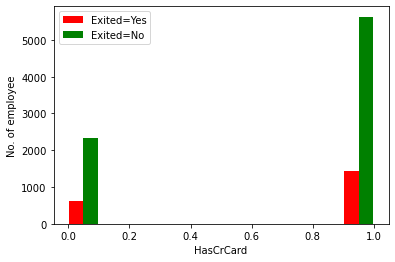

In [88]:
exited_yes= df[df.Exited==1].HasCrCard
exited_no= df[df.Exited==0].HasCrCard
plt.xlabel('HasCrCard')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

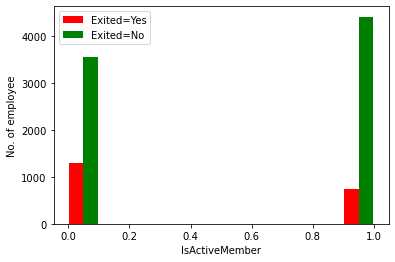

In [89]:
exited_yes= df[df.Exited==1].IsActiveMember
exited_no= df[df.Exited==0].IsActiveMember
plt.xlabel('IsActiveMember')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

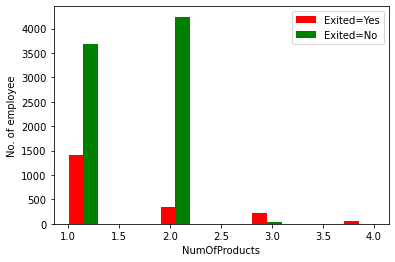

In [90]:
exited_yes= df[df.Exited==1].NumOfProducts
exited_no= df[df.Exited==0].NumOfProducts
plt.xlabel('NumOfProducts')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

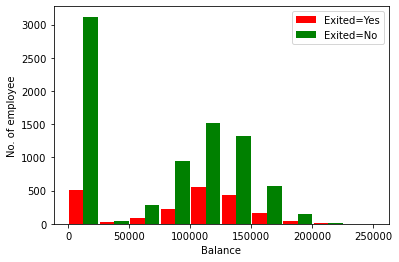

In [91]:
exited_yes= df[df.Exited==1].Balance
exited_no= df[df.Exited==0].Balance
plt.xlabel('Balance')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

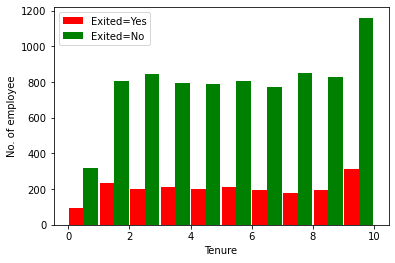

In [92]:
exited_yes= df[df.Exited==1].Tenure
exited_no= df[df.Exited==0].Tenure
plt.xlabel('Tenure')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

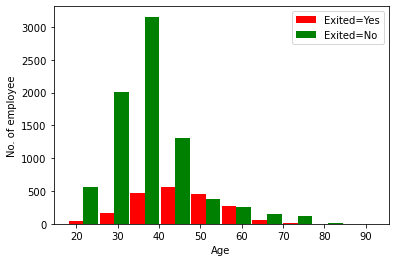

In [93]:
exited_yes= df[df.Exited==1].Age
exited_no= df[df.Exited==0].Age
plt.xlabel('Age')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

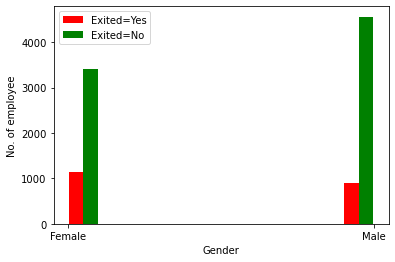

In [94]:
exited_yes= df[df.Exited==1].Gender
exited_no= df[df.Exited==0].Gender
plt.xlabel('Gender')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

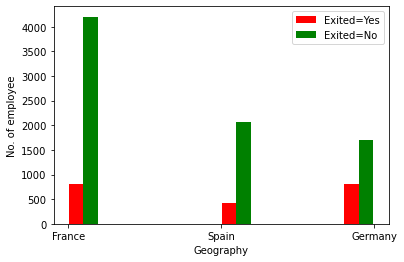

In [95]:
exited_yes= df[df.Exited==1].Geography
exited_no= df[df.Exited==0].Geography
plt.xlabel('Geography')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

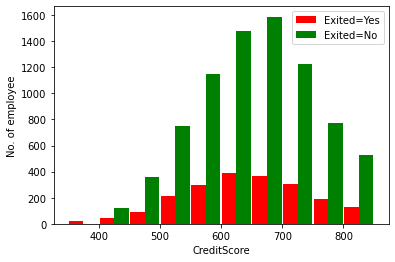

In [96]:
exited_yes= df[df.Exited==1].CreditScore
exited_no= df[df.Exited==0].CreditScore
plt.xlabel('CreditScore')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

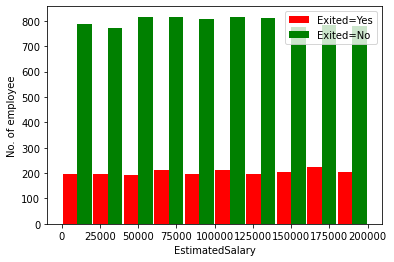

In [97]:
exited_yes= df[df.Exited==1].EstimatedSalary
exited_no= df[df.Exited==0].EstimatedSalary
plt.xlabel('EstimatedSalary')
plt.ylabel('No. of employee')
plt.hist([exited_yes, exited_no],rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

## Again removing the columns which are note much important

In [98]:
df.drop(['CreditScore','Balance','EstimatedSalary','Age'], axis=1, inplace=True)

In [99]:
df

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


## object data handling

In [100]:
def print_unique_values(df1):
    for column in df1:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [101]:
print_unique_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


## Creating dummy vlaues

In [102]:
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True)

In [103]:
df_new= pd.get_dummies(data=df, columns=['Geography'])

In [104]:
df_new

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0,2,1,1,1,1,1,0,0
1,0,1,1,0,1,0,0,0,1
2,0,8,3,1,0,1,1,0,0
3,0,1,2,0,0,0,1,0,0
4,0,2,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
9995,1,5,2,1,0,0,1,0,0
9996,1,10,1,1,1,0,1,0,0
9997,0,7,1,0,1,1,1,0,0
9998,1,3,2,1,0,1,0,1,0


In [105]:
col_to_scale=['NumOfProducts','Tenure']
df_final=scaler.fit_transform(df_new[col_to_scale])

In [106]:
df_final=pd.DataFrame(df_final, columns=['NumOfProducts2', 'Tenure2'])

In [107]:
df_final

,NumOfProducts2,Tenure2
0,0.000000,0.2
1,0.000000,0.1
2,0.666667,0.8
3,0.333333,0.1
4,0.000000,0.2
...,...,...
9995,0.333333,0.5
9996,0.000000,1.0
9997,0.000000,0.7
9998,0.333333,0.3


In [146]:
df_new

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0,2,1,1,1,1,1,0,0
1,0,1,1,0,1,0,0,0,1
2,0,8,3,1,0,1,1,0,0
3,0,1,2,0,0,0,1,0,0
4,0,2,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
9995,1,5,2,1,0,0,1,0,0
9996,1,10,1,1,1,0,1,0,0
9997,0,7,1,0,1,1,1,0,0
9998,1,3,2,1,0,1,0,1,0


In [176]:
My_df= pd.concat([df_new, df_final], axis='columns')

In [177]:
My_df

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts2,Tenure2
0,0,2,1,1,1,1,1,0,0,0.000000,0.2
1,0,1,1,0,1,0,0,0,1,0.000000,0.1
2,0,8,3,1,0,1,1,0,0,0.666667,0.8
3,0,1,2,0,0,0,1,0,0,0.333333,0.1
4,0,2,1,1,1,0,0,0,1,0.000000,0.2
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,5,2,1,0,0,1,0,0,0.333333,0.5
9996,1,10,1,1,1,0,1,0,0,0.000000,1.0
9997,0,7,1,0,1,1,1,0,0,0.000000,0.7
9998,1,3,2,1,0,1,0,1,0,0.333333,0.3


In [178]:
My_df

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts2,Tenure2
0,0,2,1,1,1,1,1,0,0,0.000000,0.2
1,0,1,1,0,1,0,0,0,1,0.000000,0.1
2,0,8,3,1,0,1,1,0,0,0.666667,0.8
3,0,1,2,0,0,0,1,0,0,0.333333,0.1
4,0,2,1,1,1,0,0,0,1,0.000000,0.2
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,5,2,1,0,0,1,0,0,0.333333,0.5
9996,1,10,1,1,1,0,1,0,0,0.000000,1.0
9997,0,7,1,0,1,1,1,0,0,0.000000,0.7
9998,1,3,2,1,0,1,0,1,0,0.333333,0.3


In [150]:
X= My_df.drop('Exited', axis='columns')
y= My_df.Exited

## splitting the dataset

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=5)

In [152]:
X_train.shape

(7000, 10)

In [153]:
X_test.shape

(3000, 10)

In [154]:
len(X_train.columns)

10

## Creating neuron layers

In [156]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.5392 - accuracy: 0.7943
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7943
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7943
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7943
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7943
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7943
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7943
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7943
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7943
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4695 - accura

In [157]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

94/94 [==============================] - 0s 1ms/step


In [158]:
y_pred[:10], y_test[:10]

([0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 7054    0
 442     0
 3954    0
 2288    0
 3196    0
 6178    0
 8351    0
 5658    1
 2065    0
 413     1
 Name: Exited, dtype: int64)

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2403
           1       0.66      0.26      0.38       597

    accuracy                           0.83      3000
   macro avg       0.75      0.62      0.64      3000
weighted avg       0.80      0.83      0.80      3000



In [160]:
sdf1=df[df.Exited==0]

In [161]:
sdf1.shape

(7963, 7)

In [162]:
sdf2=df[df.Exited==1]

In [163]:
sdf2.shape

(2037, 7)

## Imbalaced dataset

## Method 1: using undersampling technique

In [179]:
My_df

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts2,Tenure2
0,0,2,1,1,1,1,1,0,0,0.000000,0.2
1,0,1,1,0,1,0,0,0,1,0.000000,0.1
2,0,8,3,1,0,1,1,0,0,0.666667,0.8
3,0,1,2,0,0,0,1,0,0,0.333333,0.1
4,0,2,1,1,1,0,0,0,1,0.000000,0.2
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,5,2,1,0,0,1,0,0,0.333333,0.5
9996,1,10,1,1,1,0,1,0,0,0.000000,1.0
9997,0,7,1,0,1,1,1,0,0,0.000000,0.7
9998,1,3,2,1,0,1,0,1,0,0.333333,0.3


In [197]:
counts_Exited_0, counts_Exited_1= My_df.Exited.value_counts()

In [198]:
My_df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [199]:
My_df_exited_0 = My_df[My_df['Exited']==0]
My_df_exited_1 = My_df[My_df['Exited']==1]

In [206]:
df_Exited_0_us = My_df_exited_0.sample(counts_Exited_1)
df_test_us = pd.concat([df_Exited_0_us, My_df_exited_1], axis=0)

In [207]:
A = df_test_us.drop('Exited',axis='columns')
B = df_test_us['Exited']
X_train_us, X_test_us, y_train_us, y_test_us= train_test_split(A, B, test_size=0.2, stratify=B)

In [208]:
len(X_train_us.columns)

10

In [209]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_us, y_train_us, epochs=100)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.7053 - accuracy: 0.4940
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5029
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5471
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5882
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6171
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6364
Epoch 7/100
102/102 [==============================] - 0s 939us/step - loss: 0.6460 - accuracy: 0.6379
Epoch 8/100
102/102 [==============================] - 0s 945us/step - loss: 0.6374 - accuracy: 0.6462
Epoch 9/100
102/102 [==============================] - 0s 948us/step - loss: 0.6316 - accuracy: 0.6496
Epoch 10/100
102/102 [==============================] - 0s 956us/step - loss: 0.6223 

In [211]:
yp = model.predict(X_test_us)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

26/26 [==============================] - 0s 823us/step


In [212]:
print(classification_report(y_test_us, y_pred)) #f1 score improved

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       407
           1       0.75      0.74      0.74       408

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815



## Method:2 oversampling

In [220]:
df_Exited_1_os = My_df_exited_1.sample(counts_Exited_0, replace=True)
df_test_os = pd.concat([df_Exited_1_os, My_df_exited_0], axis=0)

In [221]:
df_Exited_1_os.Exited.value_counts(), My_df_exited_0.Exited.value_counts()

(1    7963
 Name: Exited, dtype: int64,
 0    7963
 Name: Exited, dtype: int64)

In [224]:
C = df_test_os.drop('Exited',axis='columns')
D = df_test_os['Exited']
X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(C, D, test_size=0.2, stratify=D)

In [225]:
model.fit(X_train_os, y_train_os, epochs=100)

Epoch 1/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.7139
Epoch 2/100
399/399 [==============================] - 0s 929us/step - loss: 0.5537 - accuracy: 0.7151
Epoch 3/100
399/399 [==============================] - 0s 935us/step - loss: 0.5548 - accuracy: 0.7149
Epoch 4/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.7145
Epoch 5/100
399/399 [==============================] - 0s 986us/step - loss: 0.5531 - accuracy: 0.7143
Epoch 6/100
399/399 [==============================] - 0s 941us/step - loss: 0.5530 - accuracy: 0.7168
Epoch 7/100
399/399 [==============================] - 0s 980us/step - loss: 0.5534 - accuracy: 0.7168
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.7159
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.7147
Epoch 10/100
399/399 [==============================] - 0s 950us/step - loss: 0.5

In [226]:
yp = model.predict(X_test_os)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

100/100 [==============================] - 0s 695us/step


In [227]:
print(classification_report(y_test_us, y_pred)) 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1593
           1       0.50      0.50      0.50      1593

    accuracy                           0.50      3186
   macro avg       0.50      0.50      0.50      3186
weighted avg       0.50      0.50      0.50      3186



## Oversampling using SMOTE

In [229]:
X = My_df.drop('Exited',axis='columns')
y = My_df.Exited

In [233]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm)

In [235]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
399/399 [==============================] - 0s 836us/step - loss: 0.5323 - accuracy: 0.7306
Epoch 2/100
399/399 [==============================] - 0s 840us/step - loss: 0.5311 - accuracy: 0.7301
Epoch 3/100
399/399 [==============================] - 0s 825us/step - loss: 0.5302 - accuracy: 0.7292
Epoch 4/100
399/399 [==============================] - 0s 880us/step - loss: 0.5300 - accuracy: 0.7277
Epoch 5/100
399/399 [==============================] - 0s 868us/step - loss: 0.5296 - accuracy: 0.7290
Epoch 6/100
399/399 [==============================] - 0s 913us/step - loss: 0.5301 - accuracy: 0.7290
Epoch 7/100
399/399 [==============================] - 0s 838us/step - loss: 0.5299 - accuracy: 0.7280
Epoch 8/100
399/399 [==============================] - 0s 860us/step - loss: 0.5300 - accuracy: 0.7286
Epoch 9/100
399/399 [==============================] - 0s 839us/step - loss: 0.5296 - accuracy: 0.7292
Epoch 10/100
399/399 [==============================] - 0s 871us/step - l

399/399 [==============================] - 0s 951us/step - loss: 0.5264 - accuracy: 0.7292
Epoch 81/100
399/399 [==============================] - 0s 948us/step - loss: 0.5263 - accuracy: 0.7312
Epoch 82/100
399/399 [==============================] - 0s 970us/step - loss: 0.5267 - accuracy: 0.7294
Epoch 83/100
399/399 [==============================] - 0s 912us/step - loss: 0.5265 - accuracy: 0.7292
Epoch 84/100
399/399 [==============================] - 0s 919us/step - loss: 0.5269 - accuracy: 0.7312
Epoch 85/100
399/399 [==============================] - 0s 987us/step - loss: 0.5268 - accuracy: 0.7290
Epoch 86/100
399/399 [==============================] - 0s 938us/step - loss: 0.5266 - accuracy: 0.7294
Epoch 87/100
399/399 [==============================] - 0s 904us/step - loss: 0.5268 - accuracy: 0.7307
Epoch 88/100
399/399 [==============================] - 0s 897us/step - loss: 0.5264 - accuracy: 0.7297
Epoch 89/100
399/399 [==============================] - 0s 899us/step - loss:

In [236]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

100/100 [==============================] - 0s 734us/step


In [237]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1593
           1       0.72      0.75      0.73      1593

    accuracy                           0.73      3186
   macro avg       0.73      0.73      0.73      3186
weighted avg       0.73      0.73      0.73      3186

